# Import Required Libraries

In [1]:
import sys
import os
os.chdir("..")
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl

from PMF import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Nonnegative_Antisparse_Copula'

# Source Generation and Mixing Scenario

In [3]:
N = 10000
NumberofSources = 5
NumberofMixtures = 10
Sgt = generate_correlated_copula_sources(rho = 0.0, df = 4, n_sources = NumberofSources, 
                                       size_sources = N , decreasing_correlation = True)

Sgt = 2 * Sgt - 1
print("The following is the correlation matrix of sources")
display_matrix(np.corrcoef(Sgt))

# Generate Mxr random mixing from i.i.d N(0,1)
Agt = np.random.randn(NumberofMixtures,NumberofSources)
Y = np.dot(Agt,Sgt)

SNR = 30
Y, NoisePart = addWGN(Y, SNR, return_noise = True)

SNRinp = 10 * np.log10(np.sum(np.mean((Y - NoisePart)**2, axis = 1)) / np.sum(np.mean(NoisePart**2, axis = 1)))
print("The following is the mixture matrix A")
display_matrix(Agt)
print("Input SNR is : {}".format(SNRinp))

The following is the correlation matrix of sources


<IPython.core.display.Math object>

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 30.021217635735372


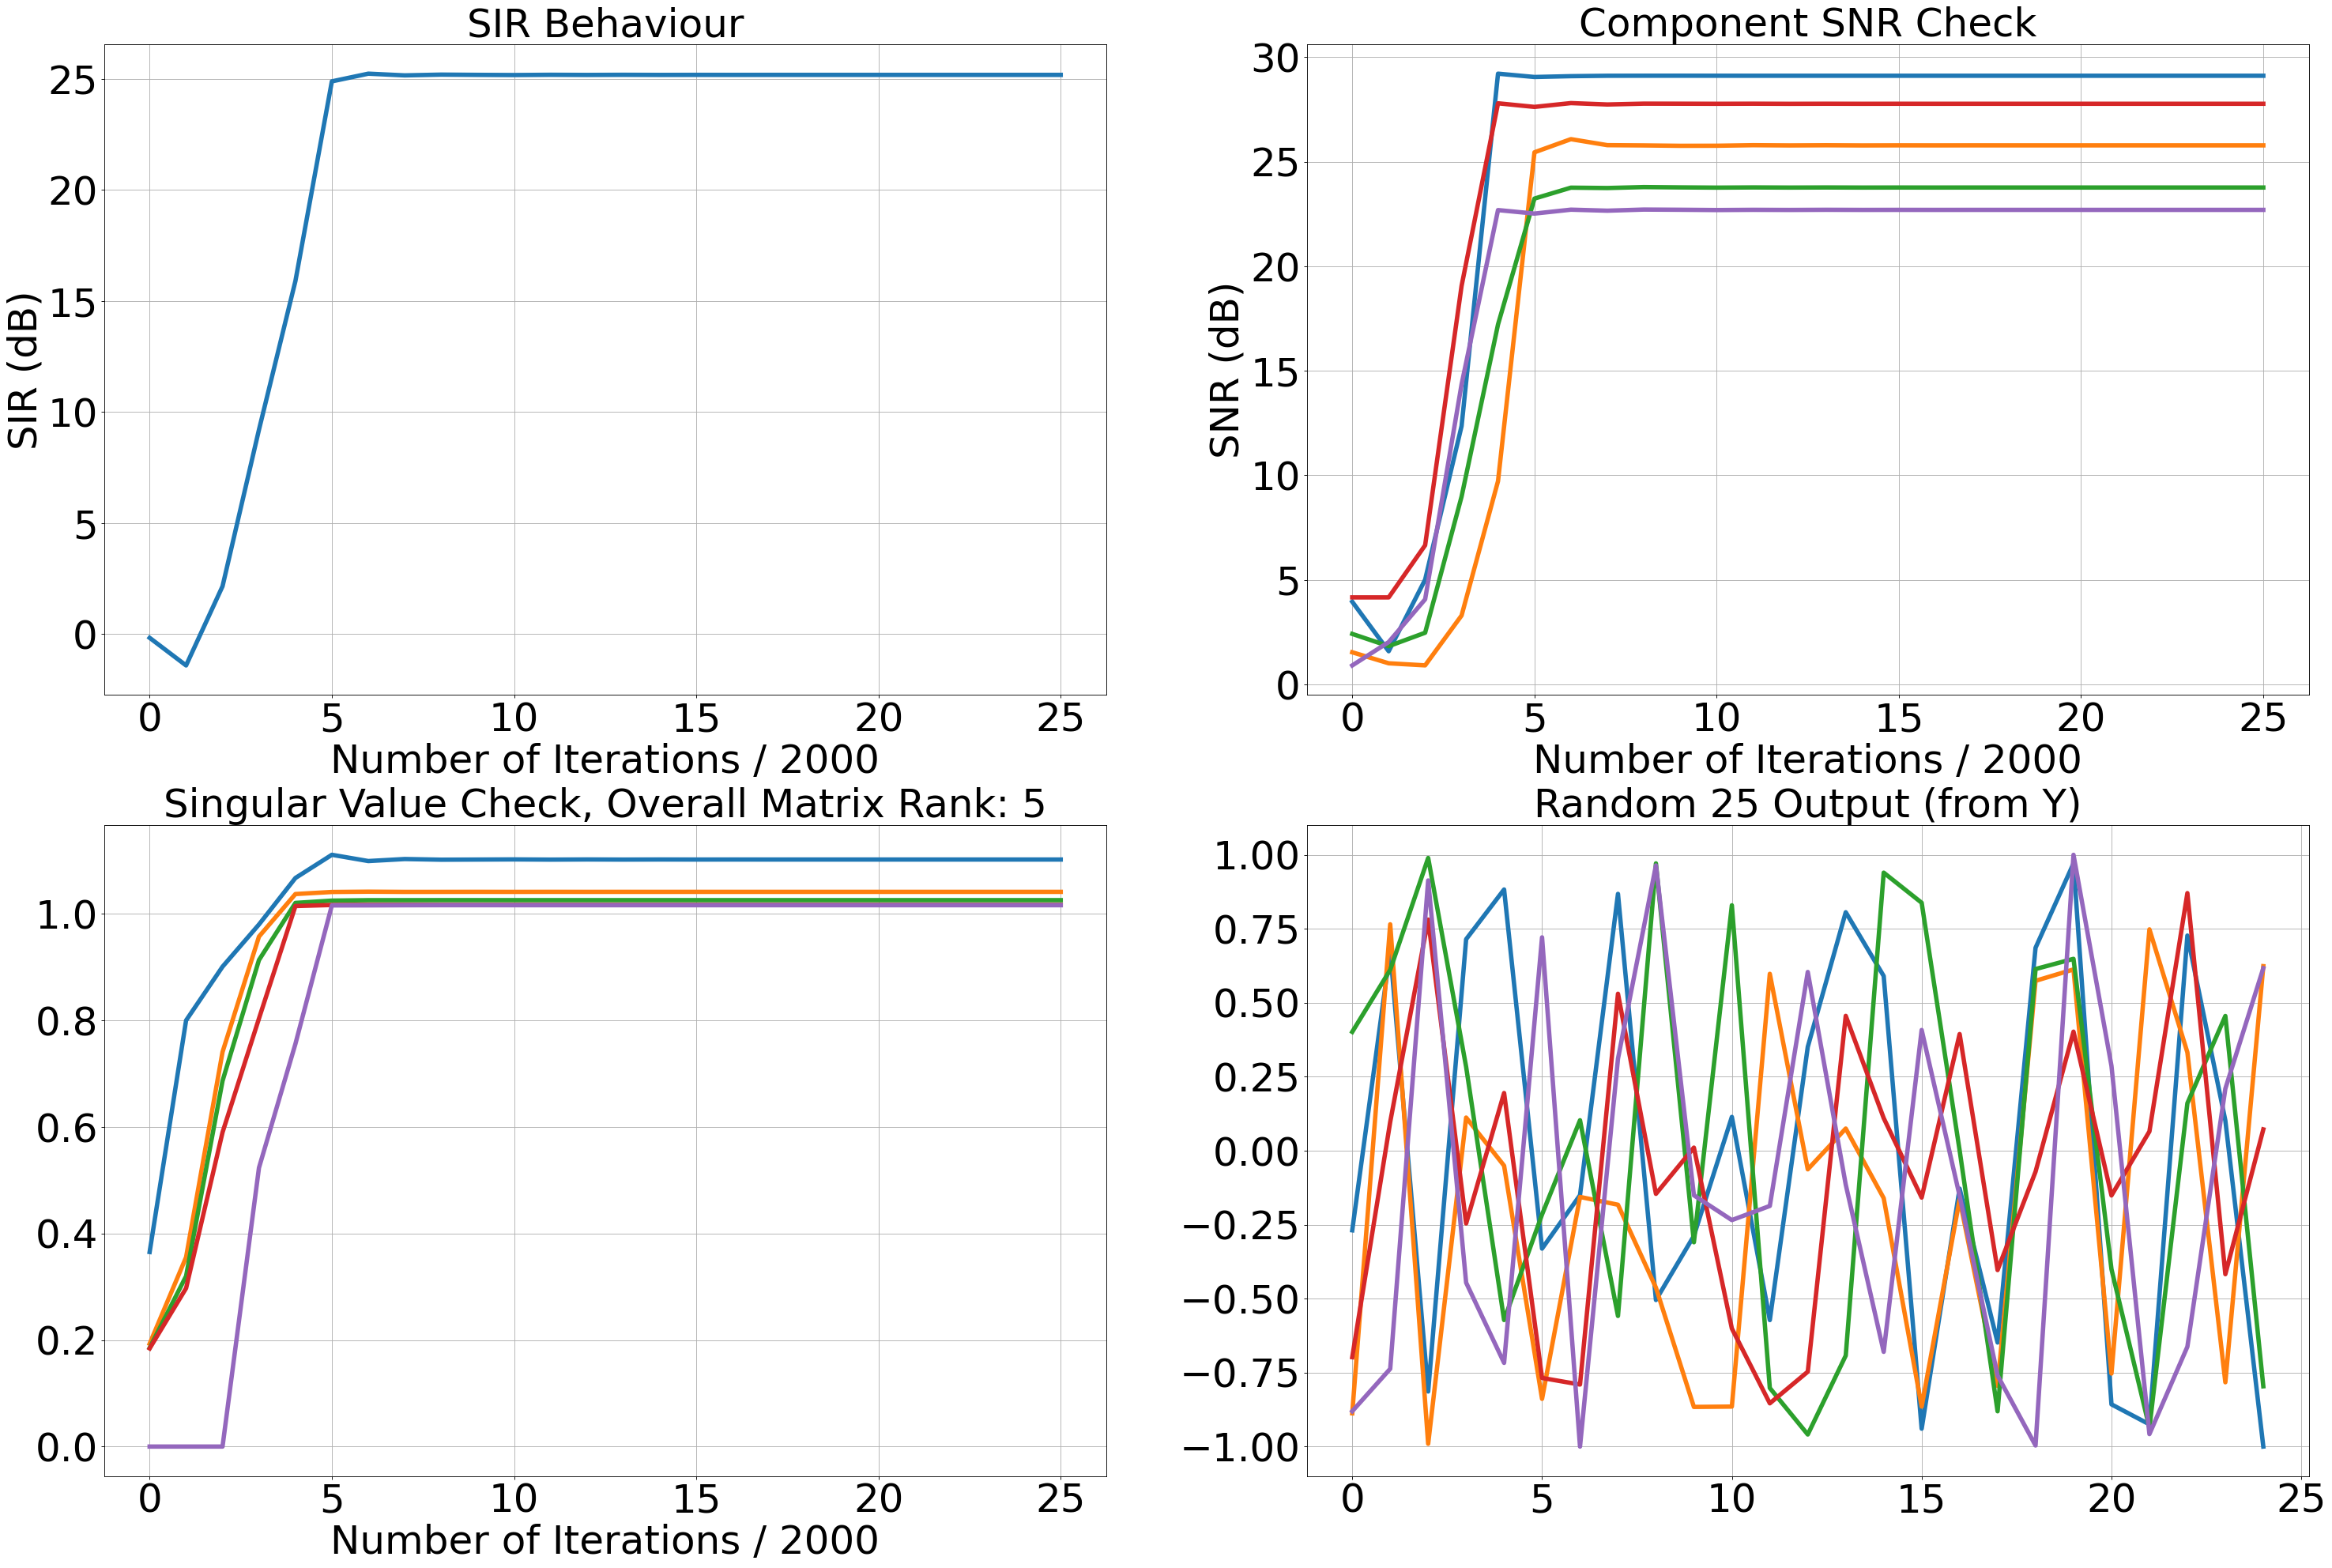

100%|██████████| 50000/50000 [02:26<00:00, 340.45it/s]


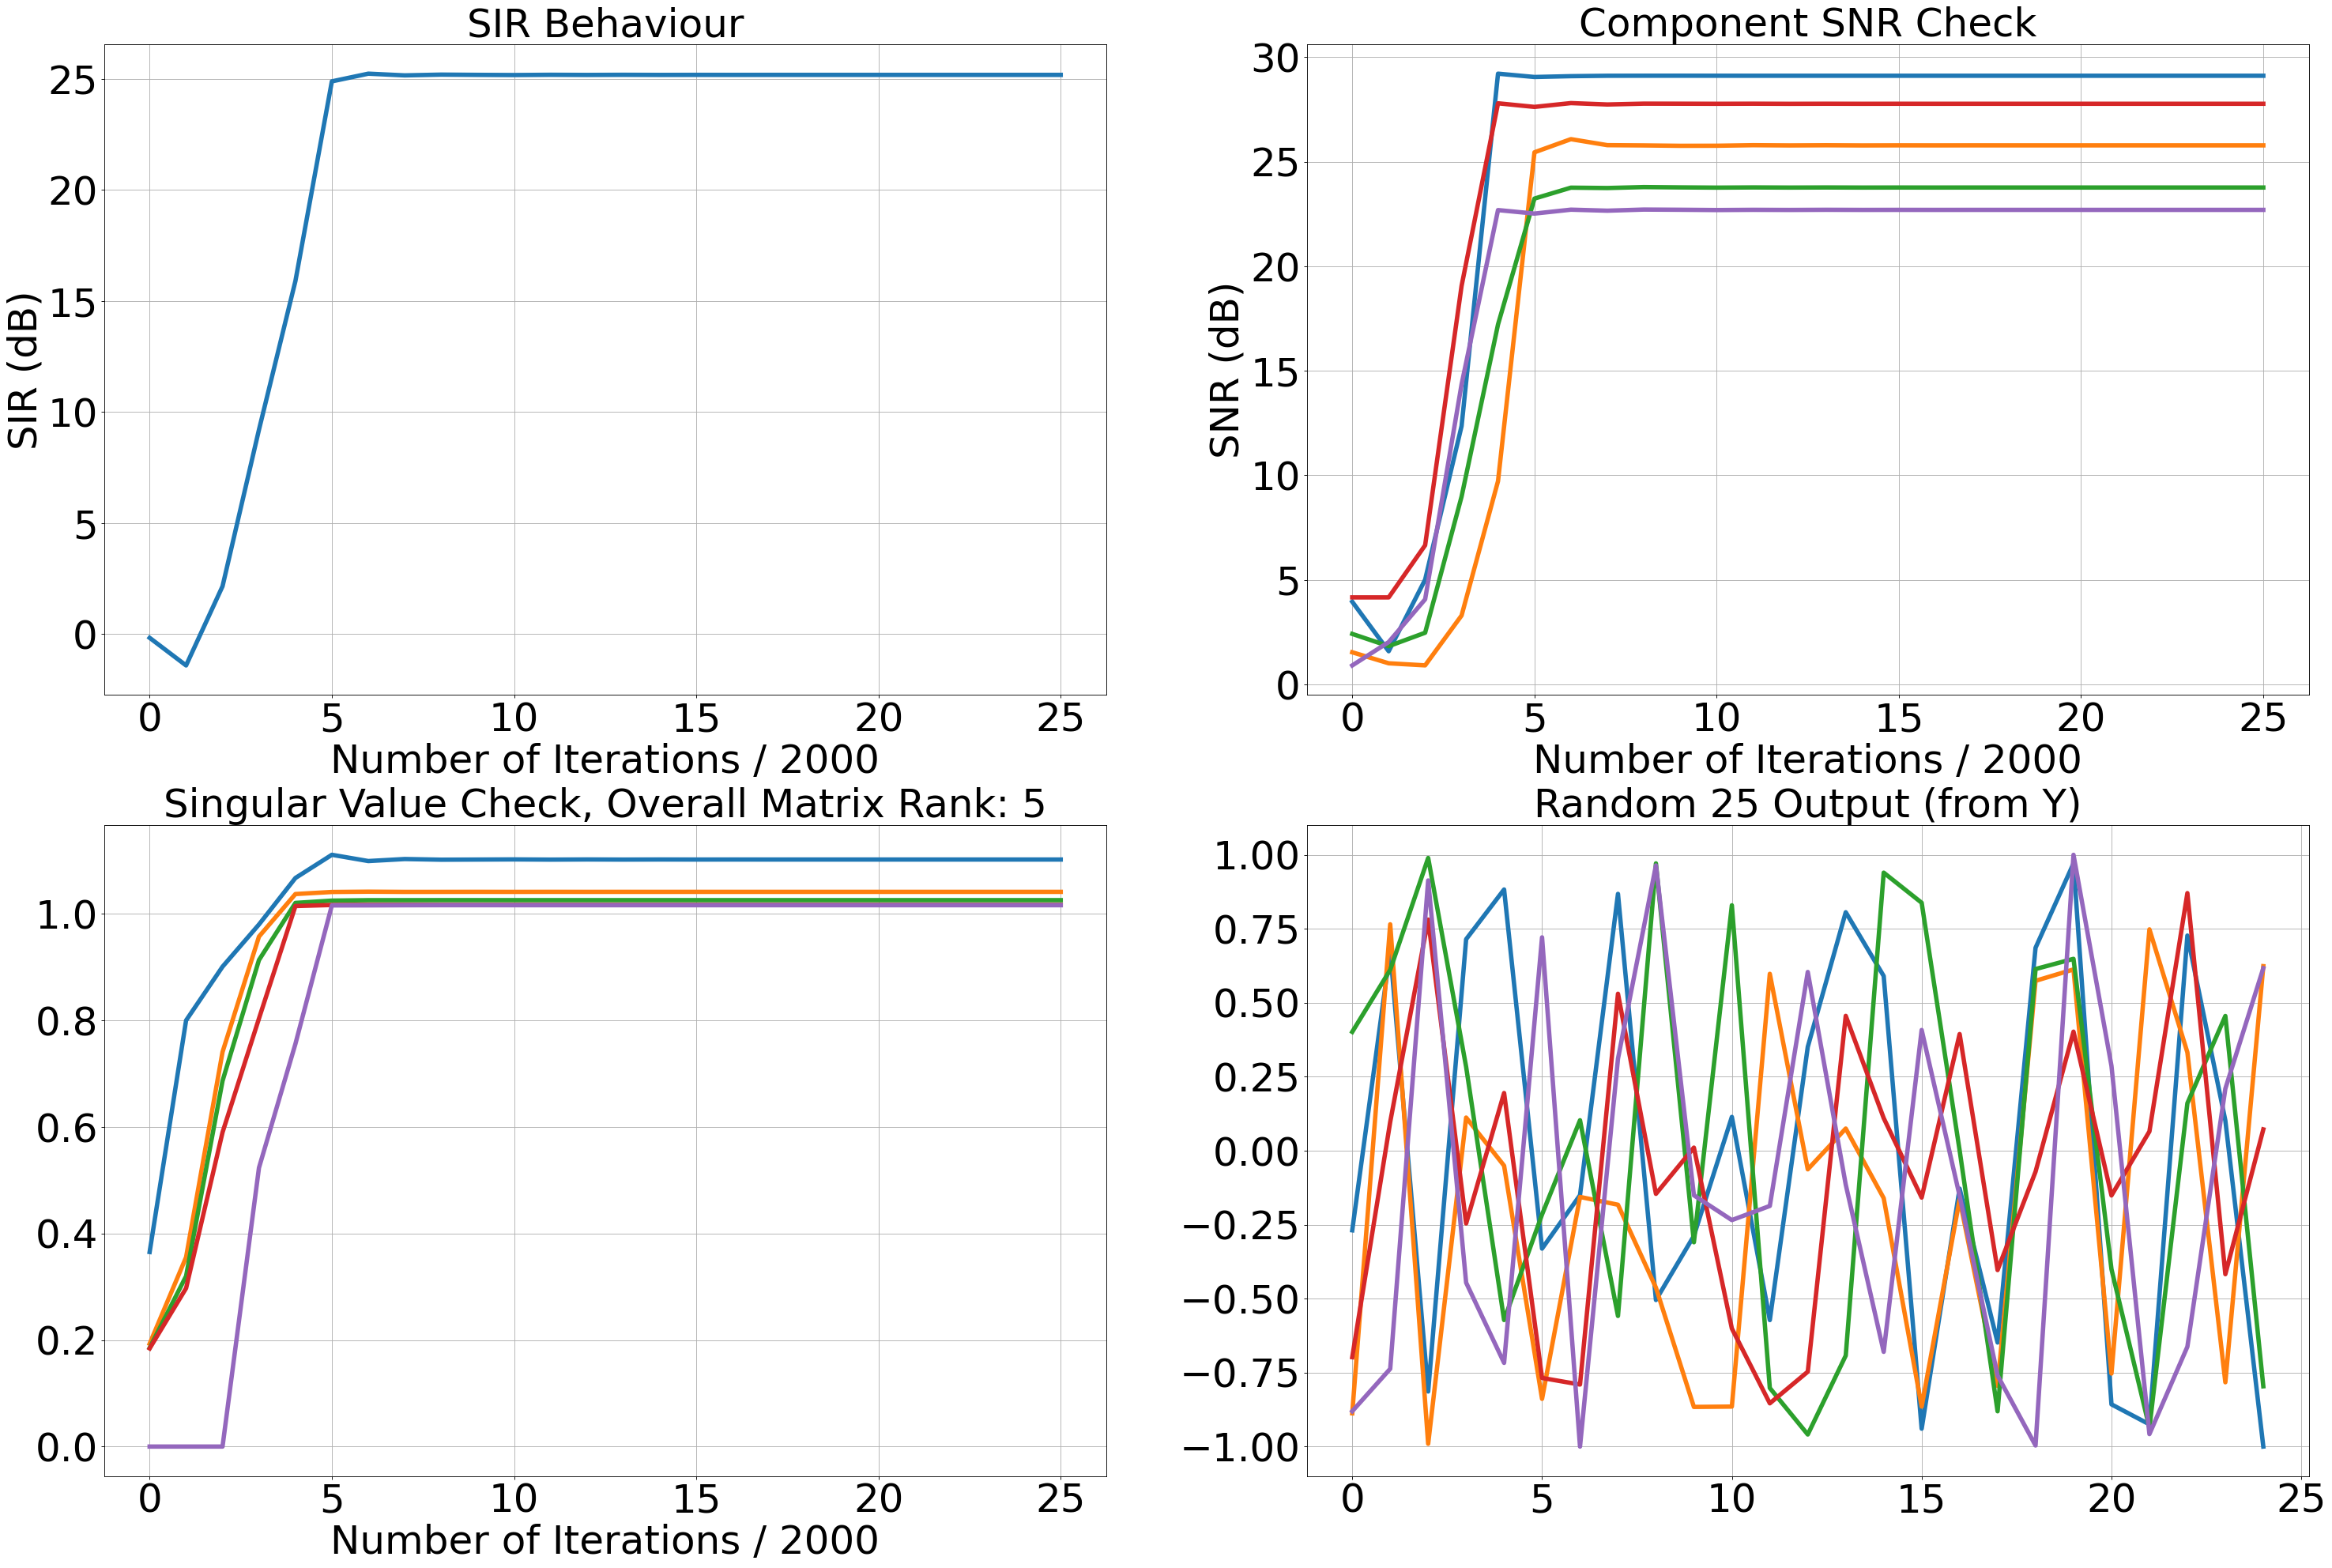

In [4]:
s_dim = Sgt.shape[0]
y_dim = Y.shape[0]
debug_iteration_point = 2000
model = PMFv1(s_dim = s_dim, y_dim = y_dim,
                set_ground_truth = True, Sgt = Sgt, Agt = Agt)
model.fit_batch_antisparse(Y, n_iterations = 50000,
                           Lt = 50, lambda_ = 28, tau = 1e-10, 
                           debug_iteration_point = debug_iteration_point,
                           plot_in_jupyter = True)

In [18]:
x_dim = Y.shape[0]
s_dim = Sgt.shape[0]
H = np.random.randn(x_dim, s_dim)
U,_,V = np.linalg.svd(Y,full_matrices=False)
S = V[0:s_dim,:]
H = U[:,:s_dim]
# H = np.eye(x_dim, s_dim)
Identity = np.eye(s_dim)
F = Identity.copy()
q = 1
Lt = 50
lambda_ = 28
tau = 1e-10

In [19]:
n_iterations = 10000

r = NumberofSources
nlamda = lambda_
dif=S

for k in tqdm(range(n_iterations)):

    Sprev=S.copy()
    S=S +((q-1)/((1+math.sqrt(1+4*q*q))/2))*(dif)
    S = S - (np.dot(H.T,(np.dot(H,S) - Y))/(Lt*np.linalg.norm(np.transpose(H)@H, 2)))
    q = (1+math.sqrt(1+4*q*q))/2
    S = np.clip(S, -1, 1)
    dif = S - Sprev


    H = np.dot(np.dot(Y,S.T),np.linalg.inv(np.dot(S,S.T)+nlamda*F))

    F = np.linalg.inv(np.dot(np.transpose(H),H)+tau*np.eye(r))

100%|██████████| 10000/10000 [00:08<00:00, 1151.55it/s]


In [20]:
# Wf = model.W
Ypmf = S
Y_ = signed_and_permutation_corrected_sources(Sgt - Sgt.mean(axis = 1, keepdims=True),Ypmf - Ypmf.mean(axis = 1, keepdims=True))
coef_ = ((Y_ * (Sgt - Sgt.mean(axis = 1, keepdims=True))).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr(Sgt - Sgt.mean(axis = 1, keepdims=True), Y_)))

SINR = 10*np.log10(CalculateSINR(Y_, (Sgt - Sgt.mean(axis = 1, keepdims=True)))[0])

print("Overall SINR : {}".format(SINR))

Component SNR Values : [29.98292638 29.2269644  31.60875633 29.10916437 29.29466389]

Overall SINR : 29.747783990760688


In [21]:
CalculateSIR(Agt, np.linalg.pinv(H))

(43.51236257947772, 5)

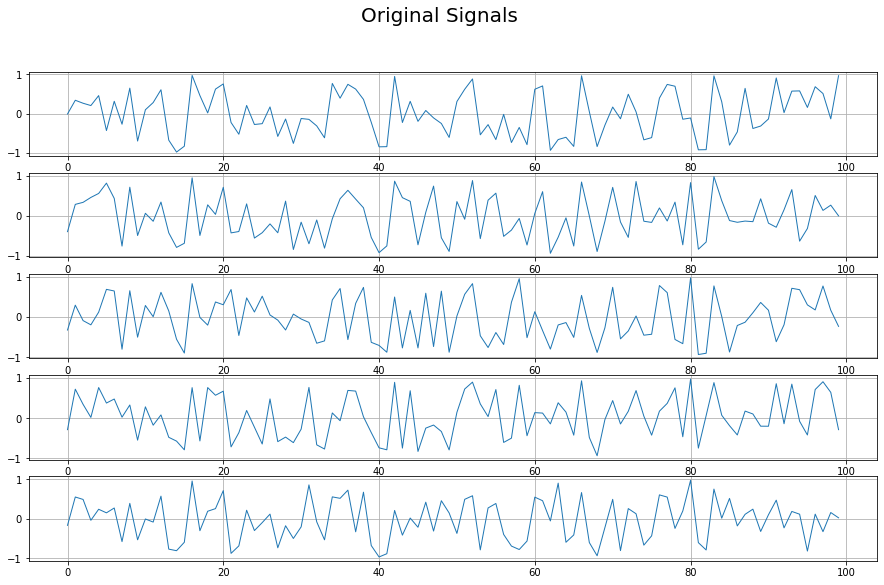

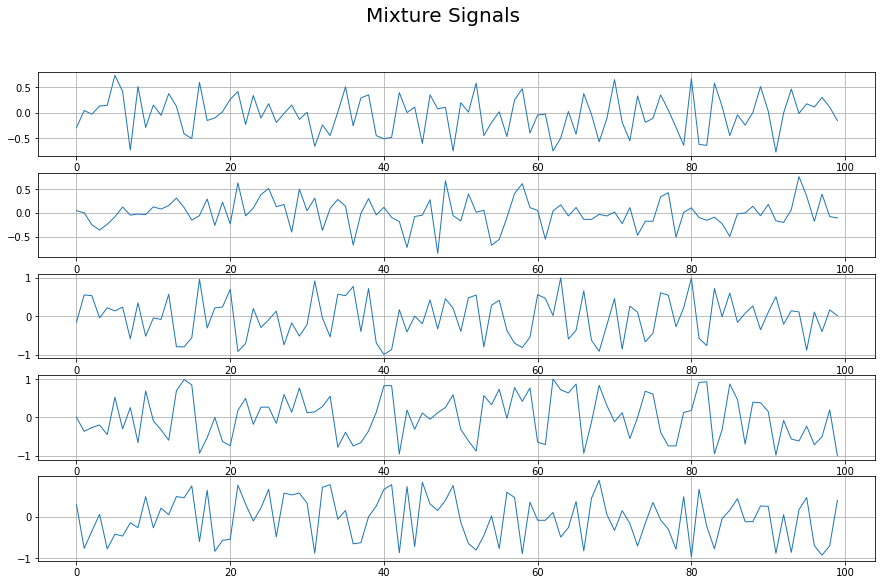

In [50]:
subplot_1D_signals(Sgt[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(Ypmf[:,0:100], title = 'Mixture Signals', figsize = (15,9), colorcode = None)

# Visualize Generated Sources and Mixtures

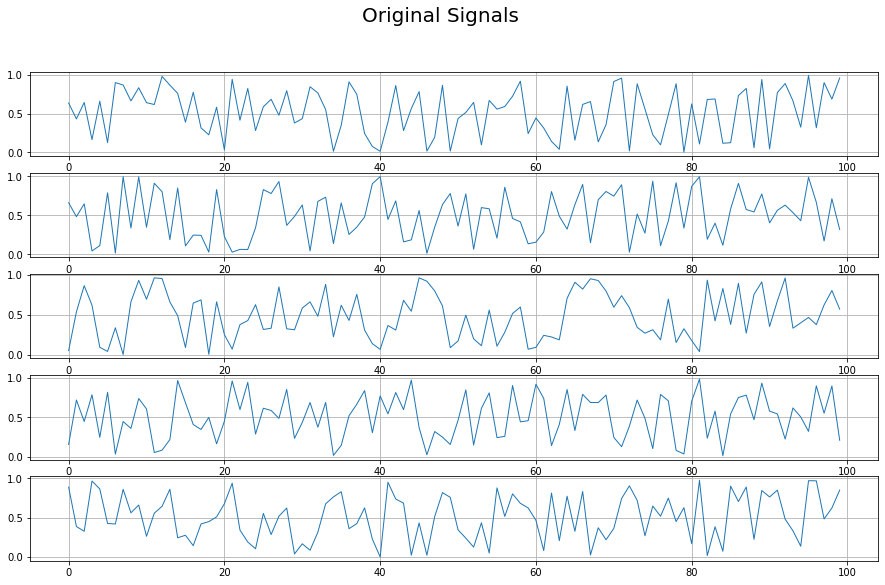

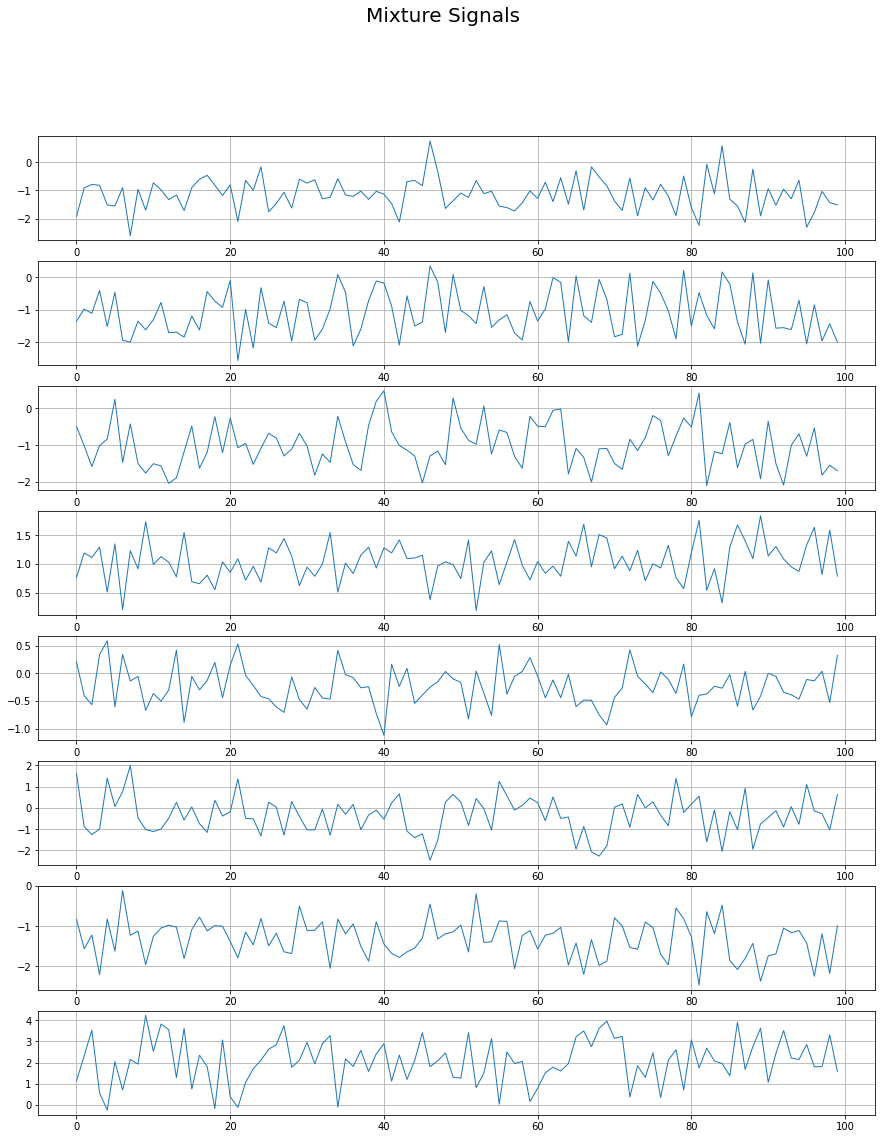

In [4]:
subplot_1D_signals(Sgt[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(Y[:,0:100], title = 'Mixture Signals', figsize = (15,18), colorcode = None)

In [35]:
N = 2000
NumberofSources = 10
NumberofMixtures = 20
Sgt = generate_correlated_copula_sources(rho = 0.0, df = 4, n_sources = NumberofSources, 
                                       size_sources = N , decreasing_correlation = False)

# print("The following is the correlation matrix of sources")
# display_matrix(np.corrcoef(Sgt))

# Generate Mxr random mixing from i.i.d N(0,1)
Agt = np.random.randn(NumberofMixtures,NumberofSources)
Y = np.dot(Agt,Sgt)

SNR = 100
Y, NoisePart = addWGN(Y, SNR, return_noise = True)

SNRinp = 10 * np.log10(np.sum(np.mean((Y - NoisePart)**2, axis = 1)) / np.sum(np.mean(NoisePart**2, axis = 1)))
# print("The following is the mixture matrix A")
# display_matrix(Agt)
print("Input SNR is : {}".format(SNRinp))

Input SNR is : 99.97488198297022


In [36]:
x_dim = Y.shape[0]
s_dim = Sgt.shape[0]
H = np.random.randn(x_dim, s_dim)
U,_,V = np.linalg.svd(Y,full_matrices=False)
S = V[0:s_dim,:]
H = U[:,:s_dim]
# H = np.eye(x_dim, s_dim)
Identity = np.eye(s_dim)
F = Identity.copy()
q = 1
Lt = 30
lambda_ = 30
tau = 1e-10

In [37]:
n_iterations = 10000

r = NumberofSources
nlamda = lambda_
dif=S*0
kk = 0
nk = 0
for k in tqdm(range(n_iterations)):

    Sprev=S.copy()
    S=S +((q-1)/((1+math.sqrt(1+4*q*q))/2))*(dif)
    S = S - (np.dot(H.T,(np.dot(H,S) - Y))/(Lt*np.linalg.norm(np.transpose(H)@H, 2)))
    q = (1+math.sqrt(1+4*q*q))/2
    S = np.clip(S, 0, 1)
    dif = S - Sprev


    H = np.dot(np.dot(Y,S.T),np.linalg.inv(np.dot(S,S.T)+nlamda*F))

    F = np.linalg.inv(np.dot(np.transpose(H),H)+tau*np.eye(r))

100%|██████████| 10000/10000 [00:03<00:00, 2573.90it/s]


In [41]:
CalculateSIR(Agt, np.linalg.pinv(H))

(-7.391451804346733, 2)

In [40]:
# Wf = model.W
Ypmf = S
Y_ = signed_and_permutation_corrected_sources(Sgt - Sgt.mean(axis = 1, keepdims=True),Ypmf - Ypmf.mean(axis = 1, keepdims=True))
coef_ = ((Y_ * (Sgt - Sgt.mean(axis = 1, keepdims=True))).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr(Sgt - Sgt.mean(axis = 1, keepdims=True), Y_)))

SINR = 10*np.log10(CalculateSINR(Y_, Sgt)[0])

print("Overall SINR : {}".format(SINR))

Component SNR Values : [ 8.44082902  3.24712381  3.39327085  9.96951459  2.68889447  4.47193792
 16.95374109  9.48672436  1.76918176 12.60143372]

Overall SINR : 5.852359828465723


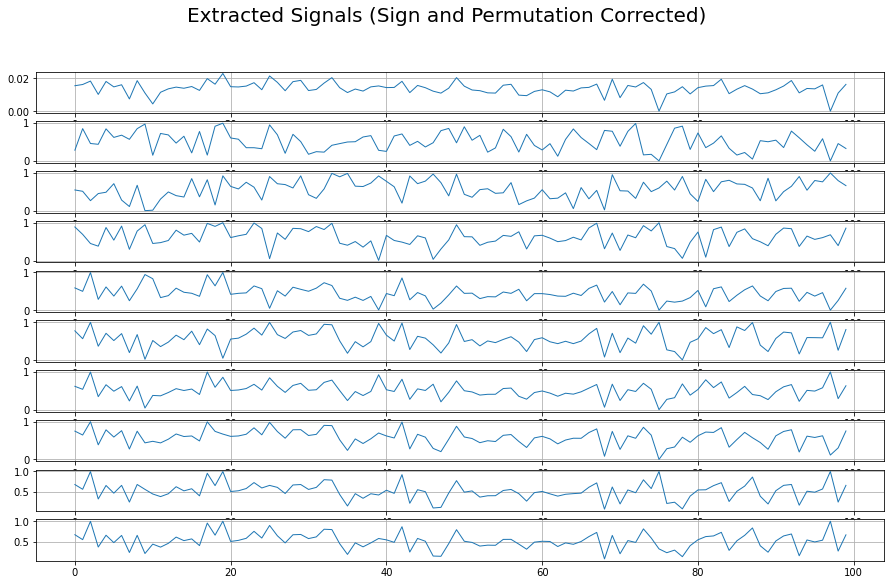

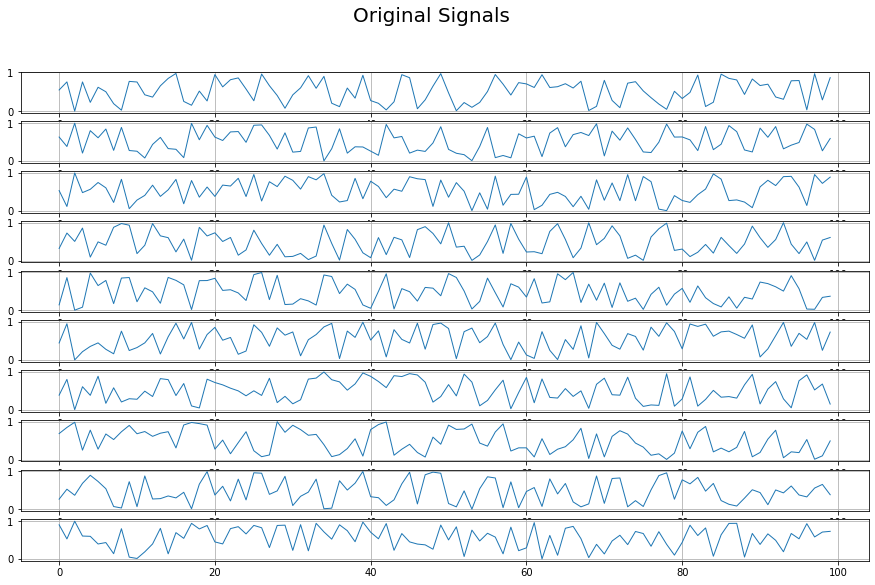

In [34]:
subplot_1D_signals(S[:,0:100], title = 'Extracted Signals (Sign and Permutation Corrected)', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(Sgt[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)

In [230]:
find_permutation_between_source_and_estimation(Sgt, )

array([0, 0, 0, 0, 0])

In [164]:
n_iterations = 1000
X = S.copy()
diff = S.copy()
for k in tqdm(range(n_iterations)):
    #### PMF Algorithm #################
    Sprev = S.copy()
    S = S + ((q-1)/((1+math.sqrt(1+4*q*q))/2))*(diff)
    S = S - H.T @ (H @ S - Y) / (Lt * np.linalg.norm(H.T @ H))
    q = (1 + math.sqrt(1 + 4 * q * q )) / 2
    S = np.clip(S, 0, 1)
    diff = S - Sprev
    H = Y @ S.T @ np.linalg.inv(S @ S.T + lambda_ * F)
    F = np.linalg.pinv(H.T @ H + tau * Identity)

100%|██████████| 1000/1000 [00:00<00:00, 2063.18it/s]


In [ ]:
W = H.copy()
H = (S.T).copy()
r = NumberofSources
dif=H
for k in tqdm(range(n_iterations)):
    kk=kk+1

    iter = k
    nk=nk+1

    fastH=H.copy()
    H=self.H+((q-1)/((1+math.sqrt(1+4*q*q))/2))*(dif)
    H = H - np.transpose((np.dot(np.transpose(W),(np.dot(W,np.transpose(H)) - Y))/(self.Lt*np.linalg.norm(np.transpose(W)@W, 2))))
    q = (1+math.sqrt(1+4*q*q))/2
    H = np.clip(H, 0, 1)
    dif = H - fastH


    W = np.dot(np.dot(Y,H),np.linalg.inv(np.dot(np.transpose(H),H)+self.nlamda*F))

    F = np.linalg.inv(np.dot(np.transpose(W),W)+tau*np.eye(r))

In [165]:
# Wf = model.W
Y = S.copy()
Y_ = signed_and_permutation_corrected_sources(S,Y)
coef_ = ((Y_ * S).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr(Sgt, Y_)))

SINR = 10*np.log10(CalculateSINR(Y_, Sgt)[0])

print("Overall SINR : {}".format(SINR))

Component SNR Values : [ 0.49394439  0.2293109  -0.20952318  0.3038404   0.00418052 -0.09411216
 -0.06128077  0.0947975  -0.25230135  0.16185374]

Overall SINR : 33.48470188178021


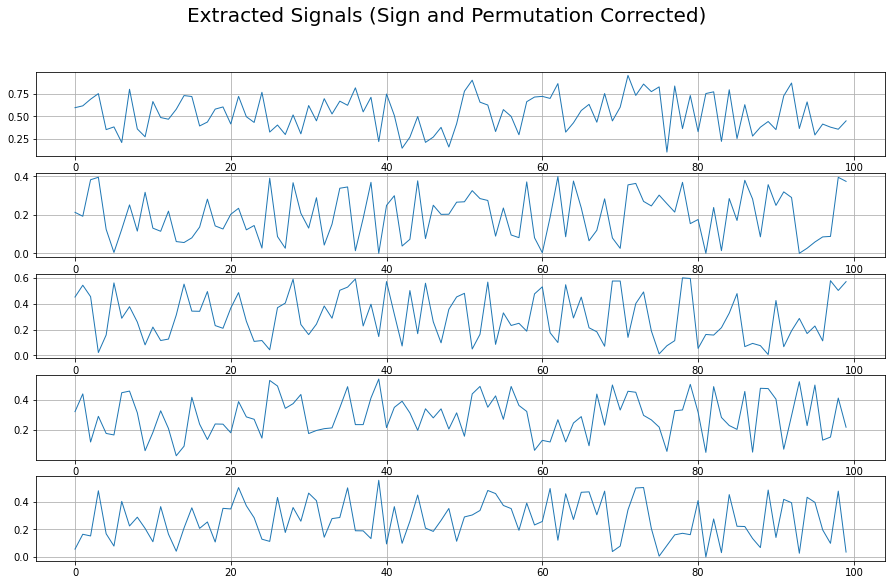

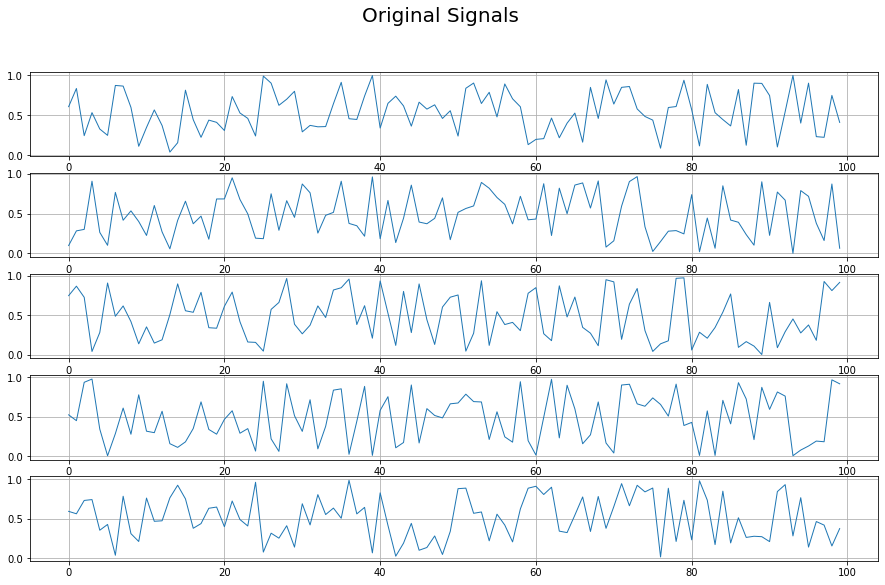

In [228]:
subplot_1D_signals(Ypmf[:,0:100], title = 'Extracted Signals (Sign and Permutation Corrected)', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(Sgt[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)

In [5]:
U,S,V = np.linalg.svd(X,full_matrices=False)
V[0:NumberofSources,:].shape

(5, 10000)

In [13]:
U[:,:NumberofSources].shape

(8, 5)

In [6]:
#---------------------------PMF---------------------------------
NumIterations=10000
R = NumberofSources
pmf2=pmf(X,R)   
pmf2.BoundMax=np.array([np.ones(R)])
pmf2.BoundMin=np.array([np.zeros(R)])
pmf2.SparseList=np.array([],dtype=object)
pmf2.SetGroundTruth(S.T)
pmf2.SetGroundTruthW(A)
pmf2.MaxIterations=1
pmf2.algorithm_iterations=1000
pmf2.step_size_rule='const'
pmf2.checklocalstationary=0
pmf2.detwindow=100
pmf2.algorithm_iterations=NumIterations
pmf2.Lt=30

In [9]:
M = NumberofMixtures
a = np.random.random(size=(M, R))
q, _ = np.linalg.qr(a)
q.shape

(8, 5)

In [ ]:
pmf2.W = q
pmf2.noisy_general(checklocalstationary=0,verbose=1,HProjectionPeriod=1,tau=1e-10,nlamda=2.5, p=2)

0


In [9]:
H = np.random.randn(x_dim, s_dim)


# Algorithm Hyperparameter Selection and Weight Initialization

In [6]:
s_dim = S.shape[0]
x_dim = X.shape[0]
debug_iteration_point = 200
model = PMF(s_dim = s_dim, x_dim = x_dim,
                set_ground_truth = True, Sgt = S, Agt = A)

# Run LDMI Algorithm on Mixture Signals

In [7]:

model.fit_batch_nnantisparse(X, Lt = 10, lambda_ = 2, tau = 1e-8, 
                             plot_in_jupyter = True)

  0%|          | 0/10000 [00:01<?, ?it/s]


AxisError: axis 1 is out of bounds for array of dimension 1

<Figure size 2000x800 with 0 Axes>

# Calculate Resulting Component SNRs and Overall SINR

In [8]:
# Wf = model.W
Y = model.S
Y_ = signed_and_permutation_corrected_sources(S,Y)
coef_ = ((Y_ * S).sum(axis = 1) / (Y_ * Y_).sum(axis = 1)).reshape(-1,1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr_jit(S, Y_)))

SINR = 10*np.log10(CalculateSINRjit(Y_, S)[0])

print("Overall SINR : {}".format(SINR))

AxisError: axis 1 is out of bounds for array of dimension 1

# Vizualize Extracted Signals Compared to Original Sources

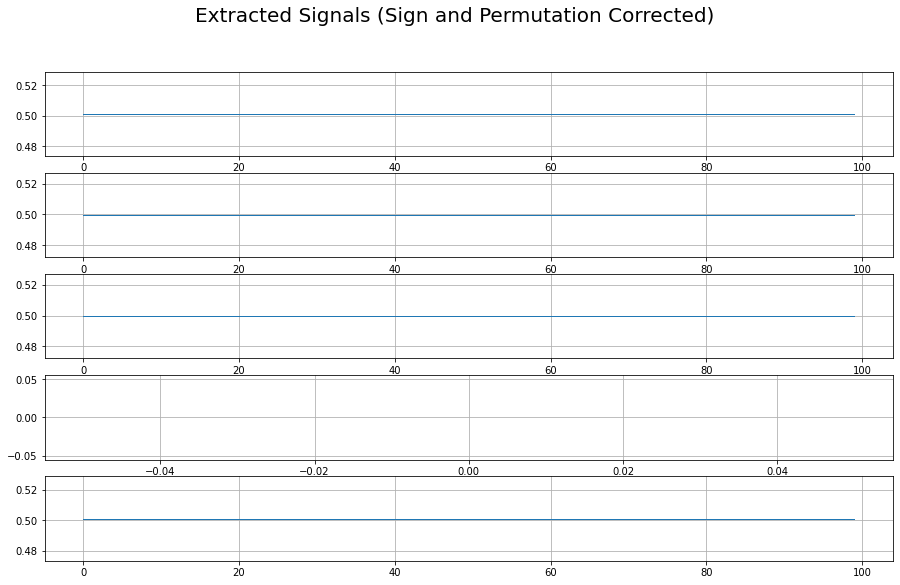

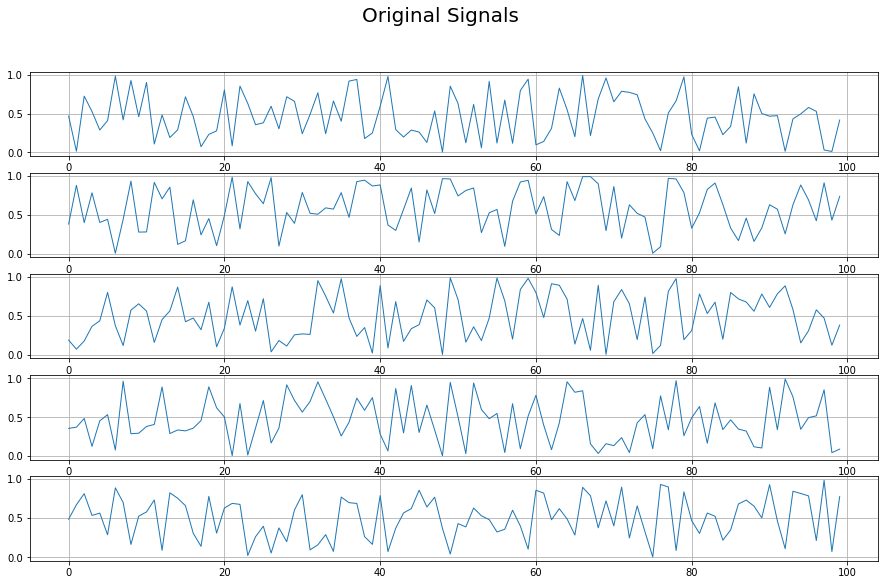

In [10]:
subplot_1D_signals(Y_[:,0:100], title = 'Extracted Signals (Sign and Permutation Corrected)', figsize = (15.2,9), colorcode = None)
subplot_1D_signals(S[:,0:100], title = 'Original Signals', figsize = (15.2,9), colorcode = None)

In [ ]:
S.shape

In [ ]:
A.shape

In [ ]:
Agt = np.random.randn(10, 5)
H = np.random.randn(10000, 5)
W = np.random.randn(10, 5)
Y = Agt @ H.T
Lt = 5

In [ ]:
(Lt*np.linalg.norm(np.transpose(W)@W, 2))

In [ ]:
(np.dot(np.transpose(W),(np.dot(W,np.transpose(H)) - Y)))